## **1. Exploración Inicial:**

   - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

   - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

   - Une los dos conjuntos de datos de la forma más eficiente. 

In [1]:
# Inicio, importar librerias necesarias:
# pandas: tratamiento de DataFrames
# numpy: control numérido
# matplotlib: visualizaciones
# seaborn: visualizaciones avanzadas


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


In [2]:
def eda(df):
    """
    Exploratory Data Analysis (EDA) profesional de un DataFrame.

    Incluye:
    - Vista general (dimensiones, tipos, primeras/últimas filas)
    - Estadísticas descriptivas (numéricas y categóricas)
    - Valores nulos, duplicados y únicos
    - Detección de outliers (numéricos)
  
    """

    
    # CONFIGURACIÓN GLOBAL DE ESTILO PARA LOS GRÁFICOS
    
    # Se ajustan parámetros visuales para mantener coherencia estética en todas las visualizaciones
    sns.set_theme(style="whitegrid", context="talk")  # Fondo blanco con rejilla y tamaño de fuente amplio
    plt.rcParams.update({
        "figure.figsize": (10, 5),         # Tamaño estándar de las figuras
        "axes.titlesize": 16,              # Tamaño de fuente del título de los gráficos
        "axes.labelsize": 13,              # Tamaño de fuente de las etiquetas de ejes
        "axes.edgecolor": "#333333",       # Color de los bordes de los ejes
        "axes.linewidth": 0.8,             # Grosor de los bordes de los ejes
        "xtick.labelsize": 11,             # Tamaño de las etiquetas del eje X
        "ytick.labelsize": 11,             # Tamaño de las etiquetas del eje Y
        "font.family": "sans-serif",       # Tipo de fuente general
        "font.sans-serif": ["DejaVu Sans"] # Fuente usada para el texto
    })

    # Colores para los distintos tipos de visualización
    color_hist = "#4B8BBE"  # Azul para histogramas
    color_box = "#E07A5F"   # Naranja para boxplots

    
    # COMPROBACIONES INICIALES DEL DATASET
    
    # Información básica: número de filas y columnas
    print(f"Dimensiones del dataset: {df.shape[0]:,} filas × {df.shape[1]:,} columnas\n")

    # Muestra las 5 primeras filas
    print(" Primeras 5 filas del dataset:")
    display(df.head())

    # Muestra las 5 últimas filas
    print("\n Últimas 5 filas del dataset:")
    display(df.tail())

    # Información general del DataFrame (tipos, nulos, memoria usada)
    print("\nInformación general:")
    df.info()

    # Tipos de datos de cada columna
    print("\nTipos de datos por columna:")
    display(df.dtypes.to_frame("Tipo de dato"))

    
    # SEPARACIÓN DE VARIABLES SEGÚN SU TIPO
    
    # Se identifican las columnas numéricas y categóricas
    num_cols = df.select_dtypes(include="number").columns.tolist()
    cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

    print(f"\nColumnas numéricas: {len(num_cols)}")
    print(f"Columnas categóricas: {len(cat_cols)}")

    
    # ESTADÍSTICAS DESCRIPTIVAS Y DETECCIÓN DE OUTLIERS
    
    if num_cols:
        print("\nEstadísticas descriptivas (numéricas):")
        # Se muestran estadísticas extendidas (con percentiles adicionales)
        display(df[num_cols].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).T)

        # Cálculo de valores atípicos mediante el rango intercuartílico (IQR)
        Q1 = df[num_cols].quantile(0.25)
        Q3 = df[num_cols].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

        # Solo se muestran columnas donde existan outliers
        outliers = outliers[outliers > 0]
        if not outliers.empty:
            print("\nPosibles outliers detectados:")
            display(outliers.to_frame("Filas con outliers"))
        else:
            print("\nNo se detectaron outliers significativos.")

    
    # ESTADÍSTICAS DESCRIPTIVAS PARA VARIABLES CATEGÓRICAS
    
    if cat_cols:
        print("\nEstadísticas descriptivas (categóricas):")
        # Muestra conteos, frecuencia de categoría más común y número de categorías
        display(df[cat_cols].describe().T)
    else:
        print("\nNo hay columnas categóricas.")

    
    # COMPROBACIÓN DE VALORES NULOS Y DUPLICADOS
    
    print("\nValores nulos por columna:")
    # Se calcula el número y porcentaje de valores nulos por columna
    nulos_df = pd.DataFrame({
        "Nulos": df.isnull().sum(),
        "% Nulos": (df.isnull().mean() * 100).round(2)
    }).sort_values("% Nulos", ascending=False)

    # Si no hay nulos, se muestra un mensaje
    if nulos_df["Nulos"].sum() == 0:
        print("No se encontraron valores nulos en el dataset.")
    else:
        display(nulos_df[nulos_df["Nulos"] > 0])

    # Cálculo del número de filas duplicadas
    dup_count = df.duplicated().sum()
    if dup_count == 0:
        print("\nNo se encontraron filas duplicadas en el dataset.")
    else:
        print(f"\nFilas duplicadas: {dup_count:,}")

    
    # RESUMEN GENERAL DEL DATASET
    
    # Se genera un resumen general con tipo de dato, valores únicos y porcentaje de nulos
    resumen = pd.DataFrame({
        "Columna": df.columns,
        "Tipo": df.dtypes.astype(str),
        "Valores únicos": df.nunique().values,
        "% Nulos": (df.isnull().mean() * 100).round(2).values
    })
    print("\nResumen general de columnas:")
    display(resumen)

    
    # VISUALIZACIONES GRÁFICAS 
    
    print("\nVisualizaciones")

    
    # VISUALIZACIÓN DE VARIABLES NUMÉRICAS
    
    print("\nGráfico variables numéricas")
    # Se excluye 'Loyalty Number' solo en los gráficos (no del análisis)
    plot_num_cols = [col for col in num_cols if col != "Loyalty Number"]

    for col in plot_num_cols:
        data = df[col].dropna()  # Se eliminan valores nulos
        if data.empty:
            continue  # Se omite si no hay datos válidos

        # Se crean dos subgráficos: uno para histograma y otro para boxplot
        fig, axes = plt.subplots(1, 2, figsize=(13, 5), gridspec_kw={'width_ratios': [2, 1]})
        fig.suptitle(f"Distribución y boxplot de {col}", fontsize=15, fontweight="bold", y=1.03)

        # Histograma con densidad (KDE)
        sns.histplot(data, kde=True, bins=30, color=color_hist, ax=axes[0])

        # Cálculo de medidas de tendencia central
        mean_val = data.mean()
        median_val = data.median()
        mode_val = data.mode()[0] if not data.mode().empty else None

        # Líneas verticales para media, mediana y moda
        axes[0].axvline(mean_val, color="red", linestyle="--", linewidth=1.3, label=f"Media ({mean_val:.2f})")
        axes[0].axvline(median_val, color="green", linestyle="--", linewidth=1.3, label=f"Mediana ({median_val:.2f})")
        if mode_val is not None:
            axes[0].axvline(mode_val, color="orange", linestyle="--", linewidth=1.3, label=f"Moda ({mode_val:.2f})")

        # Leyenda (cuadro informativo) más pequeña y más transparente
        axes[0].legend(
            fontsize=7,                # Fuente más pequeña
            loc="lower right",         # Posición en la esquina inferior derecha
            frameon=True,              # Cuadro visible
            facecolor="white",         # Fondo blanco
            edgecolor="gray",          # Borde gris
            framealpha=0.6             # Transparencia aumentada (más sutil)
        )

        # Ejes X e Y con etiquetas en negrita
        axes[0].set_xlabel(col, fontsize=12, fontweight="bold")
        axes[0].set_ylabel("Frecuencia", fontsize=12, fontweight="bold")

        # Boxplot complementario
        sns.boxplot(y=data, color=color_box, ax=axes[1])
        axes[1].set_ylabel("")  # Sin etiqueta en Y
        axes[1].set_xlabel("")  # Sin etiqueta en X

        # Ajuste automático de espaciado
        plt.tight_layout()
        plt.show()

    
    # VISUALIZACIÓN DE VARIABLES CATEGÓRICAS
    '''
    print("\nGráfico variables categóricas")
    if not cat_cols:
        # Si no existen columnas categóricas
        print("No hay variables categóricas en los datos en bruto.")
    else:
        for col in cat_cols:
            plt.figure(figsize=(10, 5))  # Tamaño del gráfico de barras
            order = df[col].value_counts().index[:20]  # Orden de las 20 categorías más frecuentes

            # Gráfico de barras (countplot)
            sns.countplot(
                x=col,
                hue=col,                  # Cada categoría recibe un color distinto
                data=df,
                order=order,              # Ordenar por frecuencia
                palette="crest",          # Paleta de colores suaves
                legend=False,             # Se elimina leyenda redundante
                edgecolor="gray",         # Borde gris
                linewidth=0.6             # Grosor del borde
            )

            # Título y etiquetas con formato profesional
            plt.title(f"Distribución de {col}", fontsize=14, fontweight="bold", pad=15)
            plt.xlabel(col, fontsize=12, fontweight="bold")
            plt.ylabel("Frecuencia", fontsize=12, fontweight="bold")
            plt.xticks(rotation=25, ha="right")  # Rotación de etiquetas para evitar solapamiento
            plt.tight_layout()
            plt.show()

    '''
    # RESULTADO FINAL
    
    # Se devuelve el resumen general del dataset como resultado
    return resumen



In [3]:
# Lectura de ficheros csv
#Se guardan en dos dataframes diferentes
movies80 = pd.read_csv('80smovies_data.csv', on_bad_lines='skip')
movies20 = pd.read_csv('2000smovies_data.csv', on_bad_lines='skip')
##




Dimensiones del dataset: 436 filas × 15 columnas

 Primeras 5 filas del dataset:


,Title,ReleaseDate,Overview,VoteAverage,VoteCount,OriginalLanguage,Genres,Runtime,Tagline,Budget,Revenue,ProductionCompanies,ProductionCountries,SpokenLanguages,IMDBId
0,Johnny Be Good,1988-03-22,It's recruiting time and despite being short a...,4.541,123,en,Comedy,91,Every college in the country wants Johnny. 'Ca...,0,0,Orion Pictures,United States of America,English,tt0095409
1,Blue City,1986-05-02,Returning to the small Florida town where he g...,4.885,26,en,Drama;Action;Thriller;Crime,83,It's below Miami and above the law.,10000000,6900000,Paramount Pictures,United States of America,English,tt0090753
2,Police Academy 6: City Under Siege,1989-03-09,Our favourite police men are called together t...,5.126,821,en,Comedy;Crime,84,The Grads are going undercover in the city to ...,15000000,33200000,Warner Bros. Pictures,United States of America,English,tt0098105
3,Grease 2,1982-06-11,"It's 1961, two years after the original Grease...",5.150,658,en,Comedy;Music;Romance,115,The Music and Feeling go on Forever.,13200000,15172313,Paramount Pictures;Fine Arts Films;Robert Stig...,United Kingdom;United States of America,English,tt0084021
4,Police Academy 5: Assignment Miami Beach,1988-03-17,The Police Academy misfits travel to Miami Bea...,5.183,876,en,Comedy;Crime,90,Hold everything! The cadets are dropping in on...,14000000,19510371,Warner Bros. Pictures,United States of America,English,tt0095882



 Últimas 5 filas del dataset:


,Title,ReleaseDate,Overview,VoteAverage,VoteCount,OriginalLanguage,Genres,Runtime,Tagline,Budget,Revenue,ProductionCompanies,ProductionCountries,SpokenLanguages,IMDBId
431,Dead Poets Society,1989-06-02,"At an elite, old-fashioned boarding school in ...",8.313,10987,en,Drama,128,He was their inspiration. He made their lives ...,16400000,235900000,A Steven Haft Production;Witt/Thomas Productions,United States of America,English;Latin,tt0097165
432,Back to the Future,1985-07-03,Eighties teenager Marty McFly is accidentally ...,8.318,19551,en,Adventure;Comedy;Science Fiction,116,He was never in time for his classes. He wasn'...,19000000,381109762,Universal Pictures;Amblin Entertainment,United States of America,English,tt0088763
433,The Empire Strikes Back,1980-05-20,"The epic saga continues as Luke Skywalker, in ...",8.391,16663,en,Adventure;Action;Science Fiction,124,The Star Wars saga continues.,18000000,538400000,Lucasfilm Ltd.,United States of America,English,tt0080684
434,Once Upon a Time in America,1984-05-23,A former Prohibition-era Jewish gangster retur...,8.416,5250,en,Drama;Crime,229,"Crime, passion and lust for power.",30000000,5500000,The Ladd Company;Embassy International Picture...,United States of America;Italy,English;Français;עִבְרִית;;Italiano,tt0087843
435,Cinema Paradiso,1988-11-17,"A filmmaker recalls his childhood, when he fel...",8.450,4258,it,Drama;Romance,124,An enchanted village. A wonderful friendship. ...,5000000,11990401,RAI;Tre Forum;Les Films Ariane;TF1 Films Produ...,France;Italy,Italiano,tt0095765



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                436 non-null    object 
 1   ReleaseDate          436 non-null    object 
 2   Overview             436 non-null    object 
 3   VoteAverage          436 non-null    float64
 4   VoteCount            436 non-null    int64  
 5   OriginalLanguage     436 non-null    object 
 6   Genres               435 non-null    object 
 7   Runtime              436 non-null    int64  
 8   Tagline              399 non-null    object 
 9   Budget               436 non-null    int64  
 10  Revenue              436 non-null    int64  
 11  ProductionCompanies  435 non-null    object 
 12  ProductionCountries  435 non-null    object 
 13  SpokenLanguages      435 non-null    object 
 14  IMDBId               436 non-null    object 
dtypes: float64(1), int

,Tipo de dato
Title,object
ReleaseDate,object
Overview,object
VoteAverage,float64
VoteCount,int64
OriginalLanguage,object
Genres,object
Runtime,int64
Tagline,object
Budget,int64



Columnas numéricas: 5
Columnas categóricas: 10

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
VoteAverage,436.0,6.913505e+00,6.263089e-01,4.541,5.18895,5.89475,6.558750e+00,6.9,7.30,7.941000e+00,8.308450e+00,8.450000e+00
VoteCount,436.0,1.686778e+03,2.671026e+03,7.000,14.50000,51.75000,3.105000e+02,733.0,1764.50,6.639500e+03,1.325625e+04,1.955100e+04
Runtime,436.0,1.104610e+02,3.034288e+01,30.000,70.75000,84.75000,9.600000e+01,106.0,118.25,1.502500e+02,1.899500e+02,5.660000e+02
Budget,436.0,1.037538e+07,1.047327e+07,0.000,0.00000,0.00000,1.000000e+06,8000000.0,15000000.00,2.825000e+07,4.000000e+07,7.000000e+07
Revenue,436.0,5.285673e+07,8.859722e+07,0.000,0.00000,0.00000,3.879725e+06,23872432.5,59648316.25,2.239217e+08,4.038509e+08,7.929655e+08



Posibles outliers detectados:


,Filas con outliers
VoteAverage,12
VoteCount,50
Runtime,23
Budget,8
Revenue,39



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
Title,436,436,Cinema Paradiso,1
ReleaseDate,436,369,1982-12-17,4
Overview,436,436,"A filmmaker recalls his childhood, when he fel...",1
OriginalLanguage,436,19,en,384
Genres,435,215,Comedy,34
Tagline,399,399,An enchanted village. A wonderful friendship. ...,1
ProductionCompanies,435,358,Paramount Pictures,21
ProductionCountries,435,60,United States of America,283
SpokenLanguages,435,90,English,272
IMDBId,436,436,tt0095765,1



Valores nulos por columna:


,Nulos,% Nulos
Tagline,37,8.49
SpokenLanguages,1,0.23
Genres,1,0.23
ProductionCompanies,1,0.23
ProductionCountries,1,0.23



No se encontraron filas duplicadas en el dataset.

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
Title,Title,object,436,0.00
ReleaseDate,ReleaseDate,object,369,0.00
Overview,Overview,object,436,0.00
VoteAverage,VoteAverage,float64,359,0.00
VoteCount,VoteCount,int64,396,0.00
OriginalLanguage,OriginalLanguage,object,19,0.00
Genres,Genres,object,215,0.23
Runtime,Runtime,int64,91,0.00
Tagline,Tagline,object,399,8.49
Budget,Budget,int64,95,0.00



Visualizaciones

Gráfico variables numéricas


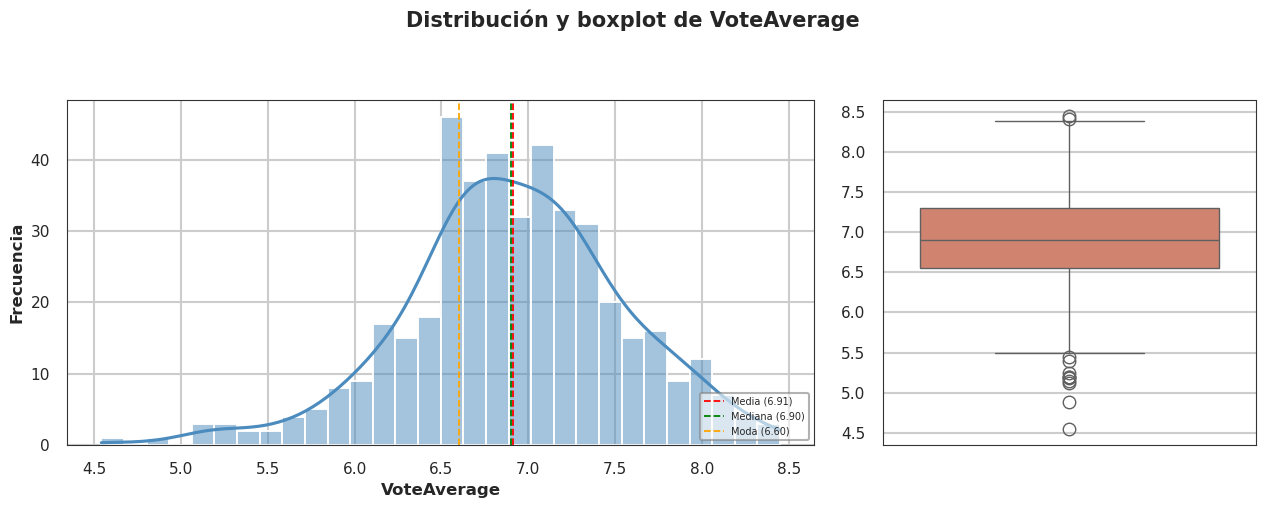

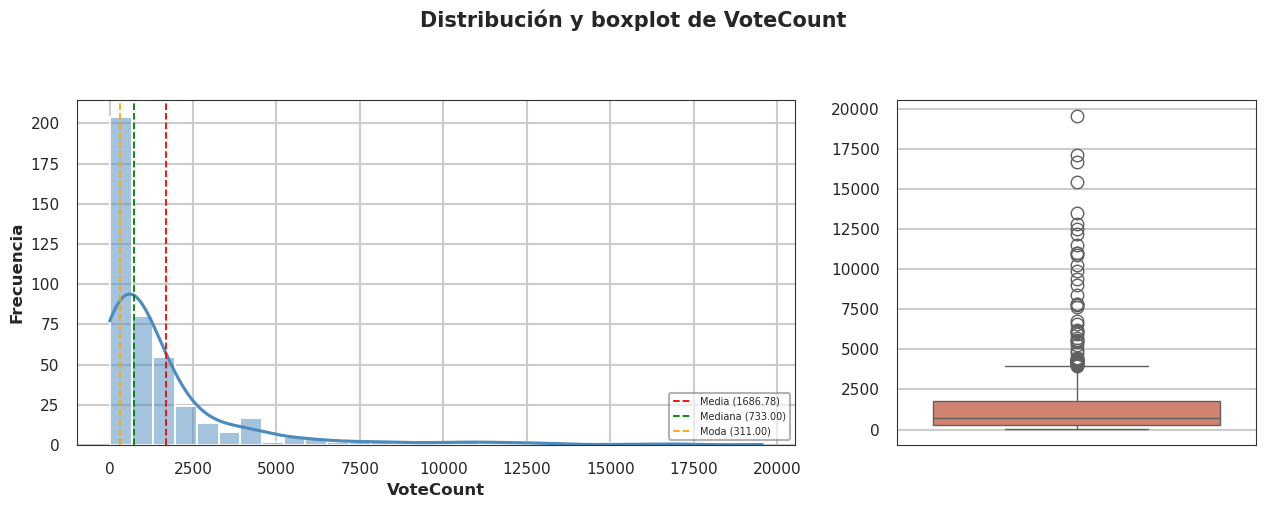

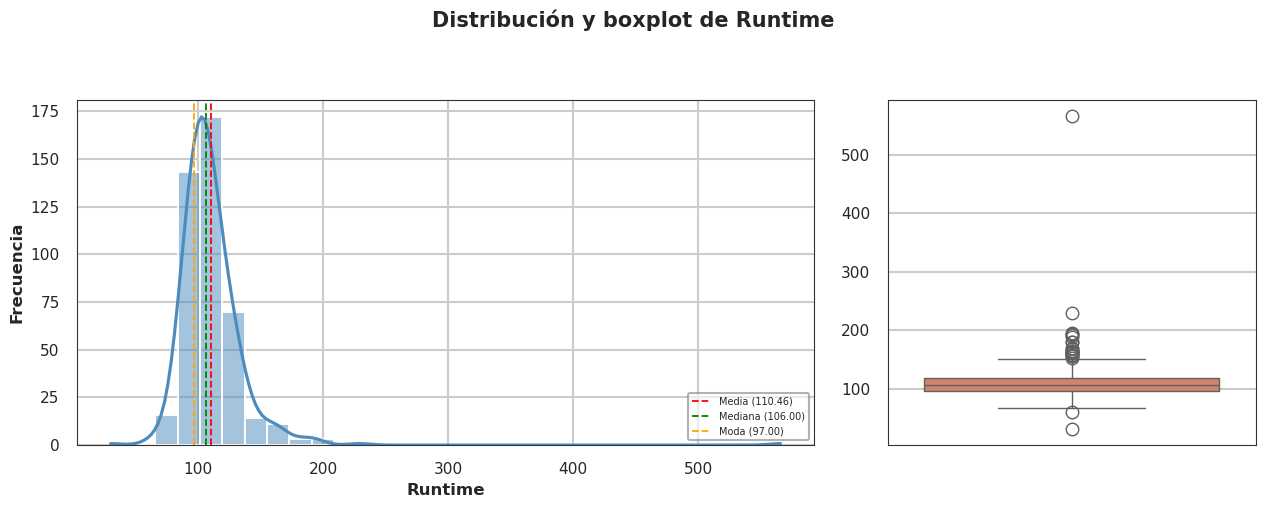

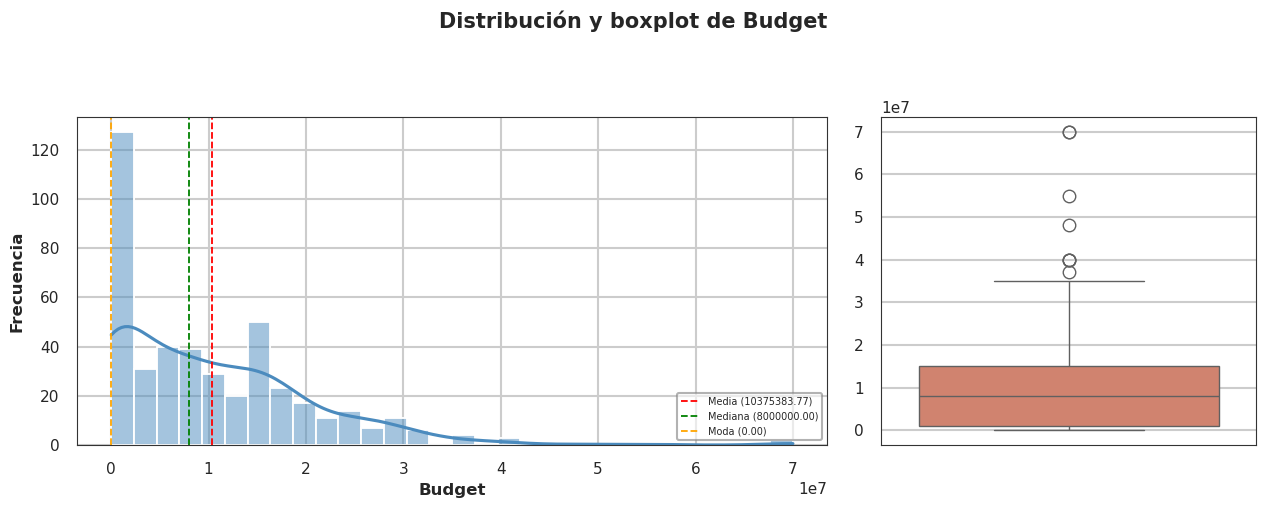

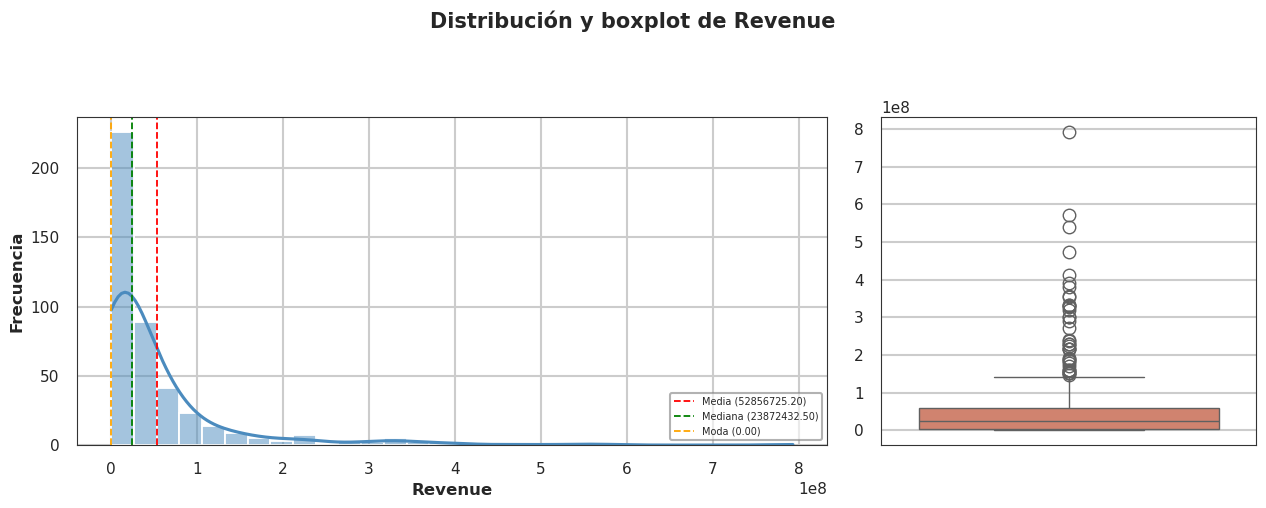

,Columna,Tipo,Valores únicos,% Nulos
Title,Title,object,436,0.00
ReleaseDate,ReleaseDate,object,369,0.00
Overview,Overview,object,436,0.00
VoteAverage,VoteAverage,float64,359,0.00
VoteCount,VoteCount,int64,396,0.00
OriginalLanguage,OriginalLanguage,object,19,0.00
Genres,Genres,object,215,0.23
Runtime,Runtime,int64,91,0.00
Tagline,Tagline,object,399,8.49
Budget,Budget,int64,95,0.00


In [4]:
eda(movies80)

Dimensiones del dataset: 775 filas × 15 columnas

 Primeras 5 filas del dataset:


,Title,ReleaseDate,Overview,VoteAverage,VoteCount,OriginalLanguage,Genres,Runtime,Tagline,Budget,Revenue,ProductionCompanies,ProductionCountries,SpokenLanguages,IMDBId
0,Next Friday,2000-01-12,A streetwise man flees South Central Los Angel...,6.432,549,en,Comedy,98,The suburbs make the hood look good.,11000000,59800000,New Line Cinema;Cube Vision,United States of America,English,tt0195945
1,The Beach,2000-02-03,Twenty-something Richard travels to Thailand a...,6.477,4271,en,Drama;Adventure;Romance;Thriller,119,Somewhere on this planet it must exist.,40000000,144100000,Figment Films;20th Century Fox,United Kingdom;United States of America,English;Français;Hrvatski;svenska;ภาษาไทย,tt0163978
2,Scream 3,2000-02-04,While Sidney Prescott and her friends visit th...,5.991,3464,en,Horror;Mystery,116,The most terrifying scream is always the last.,40000000,161834276,Dimension Films;Konrad Pictures;Craven-Maddale...,United States of America,English,tt0134084
3,Pitch Black,2000-02-18,When their ship crash-lands on a remote planet...,6.838,4296,en,Thriller;Science Fiction;Action,108,Don't be afraid of the dark. Be afraid of what...,23000000,53187659,Interscope Communications,United States of America,العربية;English,tt0134847
4,Boiler Room,2000-02-18,A college dropout gets a job as a broker for a...,6.728,636,en,Crime;Drama;Thriller,118,Welcome to the new American dream.,7000000,28780255,New Line Cinema,United States of America,English;Pусский,tt0181984



 Últimas 5 filas del dataset:


,Title,ReleaseDate,Overview,VoteAverage,VoteCount,OriginalLanguage,Genres,Runtime,Tagline,Budget,Revenue,ProductionCompanies,ProductionCountries,SpokenLanguages,IMDBId
770,Avatar,2009-12-15,"In the 22nd century, a paraplegic Marine is di...",7.582,31119,en,Action;Adventure;Fantasy;Science Fiction,162,Enter the world of Pandora.,237000000,2923706026,Dune Entertainment;Lightstorm Entertainment;20...,United States of America;United Kingdom,English;Español,tt0499549
771,Sherlock Holmes,2009-12-23,Eccentric consulting detective Sherlock Holmes...,7.213,13705,en,Action;Adventure;Crime;Mystery,129,Nothing escapes him.,90000000,524028679,Warner Bros. Pictures;Village Roadshow Picture...,United States of America,English;Français,tt0988045
772,3 Idiots,2009-12-23,Rascal. Joker. Dreamer. Genius... You've never...,7.992,2322,hi,Drama;Comedy,170,Aal Izz Well!,9000000,70000000,Vidhu Vinod Chopra Productions;Vinod Chopra Films,India,English;हिन्दी,tt1187043
773,It's Complicated,2009-12-23,"Ten years after their divorce, Jane and Jake A...",6.500,1360,en,Comedy;Romance,121,First comes marriage. Then comes divorce. And ...,85000000,219103655,Universal Pictures;Relativity Media;Waverly Fi...,Japan;United States of America,English;Français,tt1230414
774,The Lovely Bones,2009-12-26,"After being brutally murdered, 14-year-old Sus...",7.074,4503,en,Fantasy;Drama,136,The story of a life and everything that came a...,65000000,93600000,WingNut Films;DreamWorks Pictures;Film4 Produc...,United Kingdom;New Zealand;United States of Am...,English,tt0380510



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                775 non-null    object 
 1   ReleaseDate          775 non-null    object 
 2   Overview             775 non-null    object 
 3   VoteAverage          775 non-null    float64
 4   VoteCount            775 non-null    int64  
 5   OriginalLanguage     775 non-null    object 
 6   Genres               772 non-null    object 
 7   Runtime              775 non-null    int64  
 8   Tagline              736 non-null    object 
 9   Budget               775 non-null    int64  
 10  Revenue              775 non-null    int64  
 11  ProductionCompanies  768 non-null    object 
 12  ProductionCountries  772 non-null    object 
 13  SpokenLanguages      772 non-null    object 
 14  IMDBId               770 non-null    object 
dtypes: float64(1), int

,Tipo de dato
Title,object
ReleaseDate,object
Overview,object
VoteAverage,float64
VoteCount,int64
OriginalLanguage,object
Genres,object
Runtime,int64
Tagline,object
Budget,int64



Columnas numéricas: 5
Columnas categóricas: 10

Estadísticas descriptivas (numéricas):


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
VoteAverage,775.0,6.679799e+00,8.924630e-01,0.0,3.96334,5.3294,6.241000e+00,6.692000e+00,7.260000e+00,7.891700e+00,8.406000e+00,9.000000e+00
VoteCount,775.0,4.325848e+03,4.511820e+03,0.0,3.74000,232.6000,1.480000e+03,2.944000e+03,5.478500e+03,1.367770e+04,2.146294e+04,3.232500e+04
Runtime,775.0,1.107290e+02,2.229254e+01,0.0,69.00000,84.0000,9.600000e+01,1.080000e+02,1.220000e+02,1.513000e+02,1.757800e+02,2.010000e+02
Budget,775.0,4.949498e+07,4.851937e+07,0.0,0.00000,0.0000,1.400000e+07,3.400000e+07,7.225000e+07,1.500000e+08,2.018200e+08,3.000000e+08
Revenue,775.0,1.645538e+08,2.176125e+08,0.0,0.00000,0.0000,3.320000e+07,9.707615e+07,2.039567e+08,5.924201e+08,9.361717e+08,2.923706e+09



Posibles outliers detectados:


,Filas con outliers
VoteAverage,13
VoteCount,55
Runtime,26
Budget,24
Revenue,59



Estadísticas descriptivas (categóricas):


,count,unique,top,freq
Title,775,770,The Girl Next Door,2
ReleaseDate,775,633,2000-12-22,4
Overview,775,770,Exceptionally ambitious high schooler Matthew ...,2
OriginalLanguage,775,15,en,734
Genres,772,384,Comedy;Romance,35
Tagline,736,732,Matt never saw her coming... but all his frien...,2
ProductionCompanies,768,736,Walt Disney Pictures;Walt Disney Feature Anima...,4
ProductionCountries,772,139,United States of America,413
SpokenLanguages,772,187,English,439
IMDBId,770,765,tt0347149,2



Valores nulos por columna:


,Nulos,% Nulos
Tagline,39,5.03
ProductionCompanies,7,0.90
IMDBId,5,0.65
ProductionCountries,3,0.39
Genres,3,0.39
SpokenLanguages,3,0.39



Filas duplicadas: 5

Resumen general de columnas:


,Columna,Tipo,Valores únicos,% Nulos
Title,Title,object,770,0.00
ReleaseDate,ReleaseDate,object,633,0.00
Overview,Overview,object,770,0.00
VoteAverage,VoteAverage,float64,581,0.00
VoteCount,VoteCount,int64,737,0.00
OriginalLanguage,OriginalLanguage,object,15,0.00
Genres,Genres,object,384,0.39
Runtime,Runtime,int64,109,0.00
Tagline,Tagline,object,732,5.03
Budget,Budget,int64,176,0.00



Visualizaciones

Gráfico variables numéricas


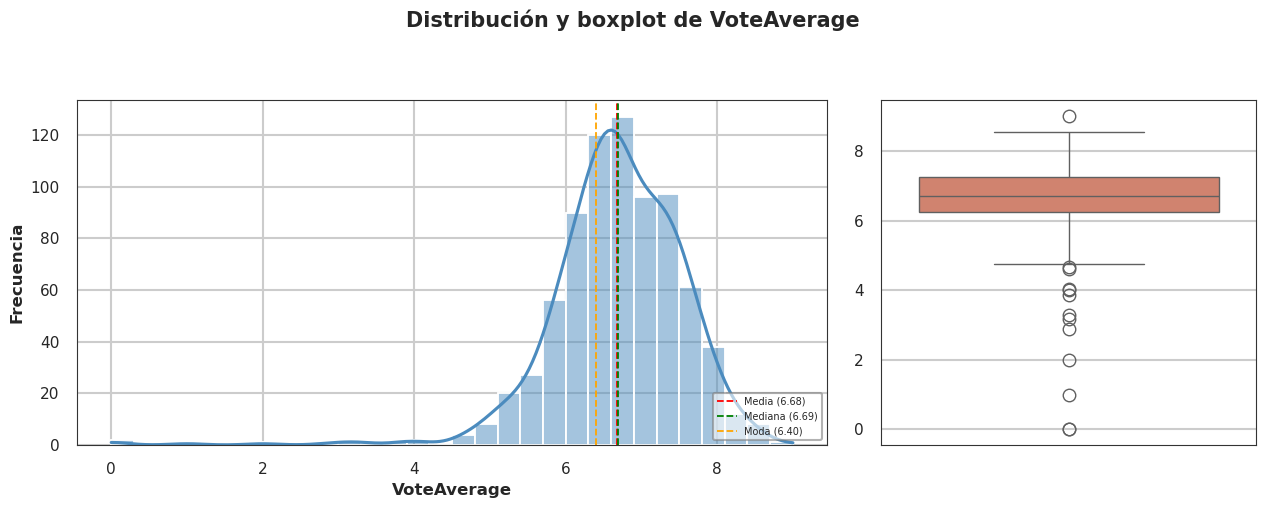

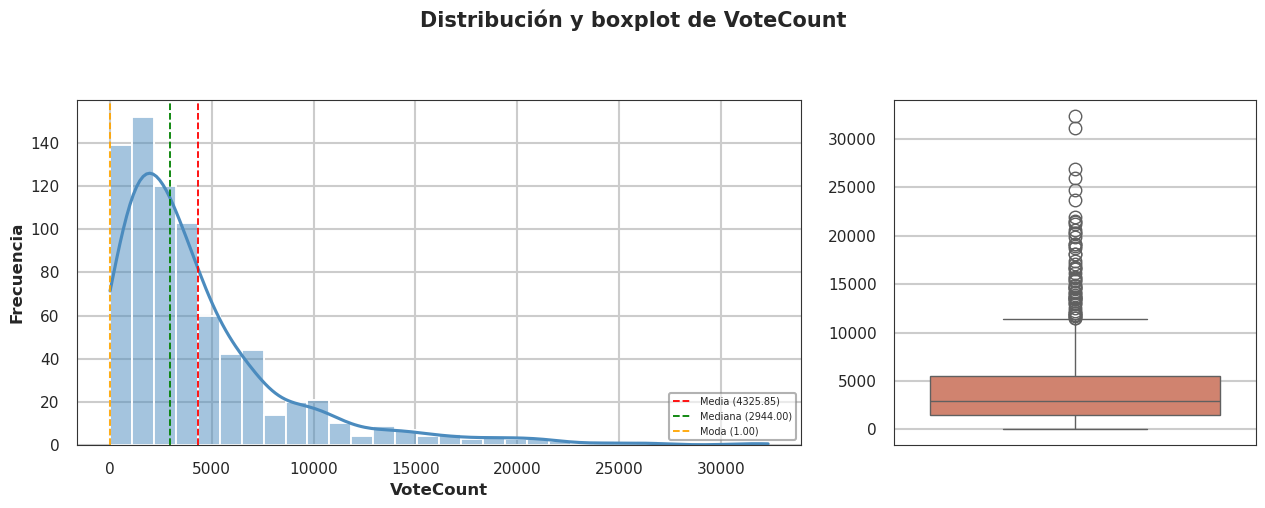

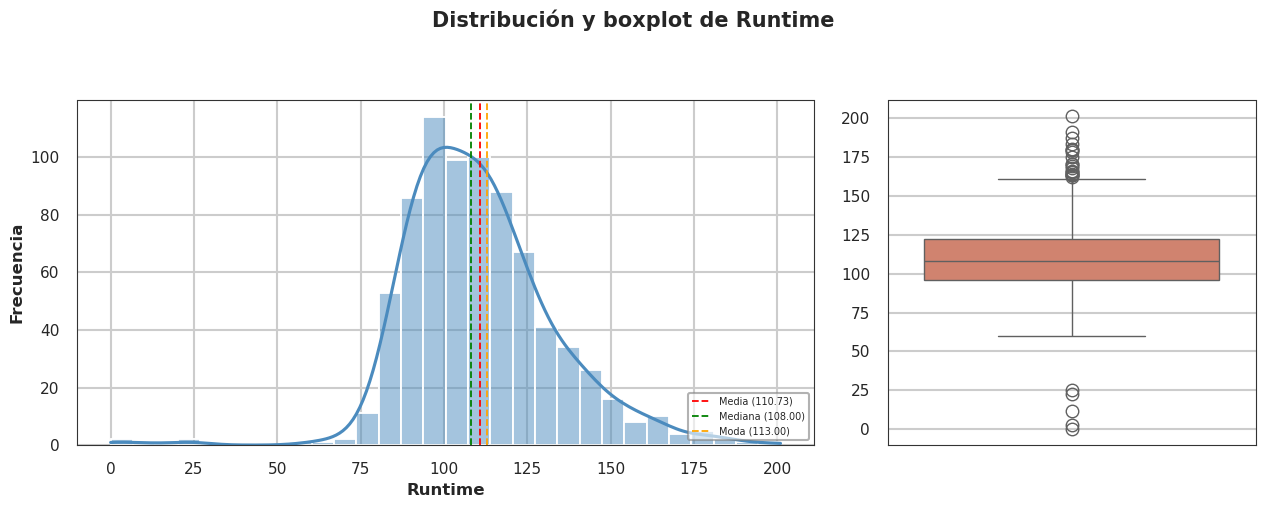

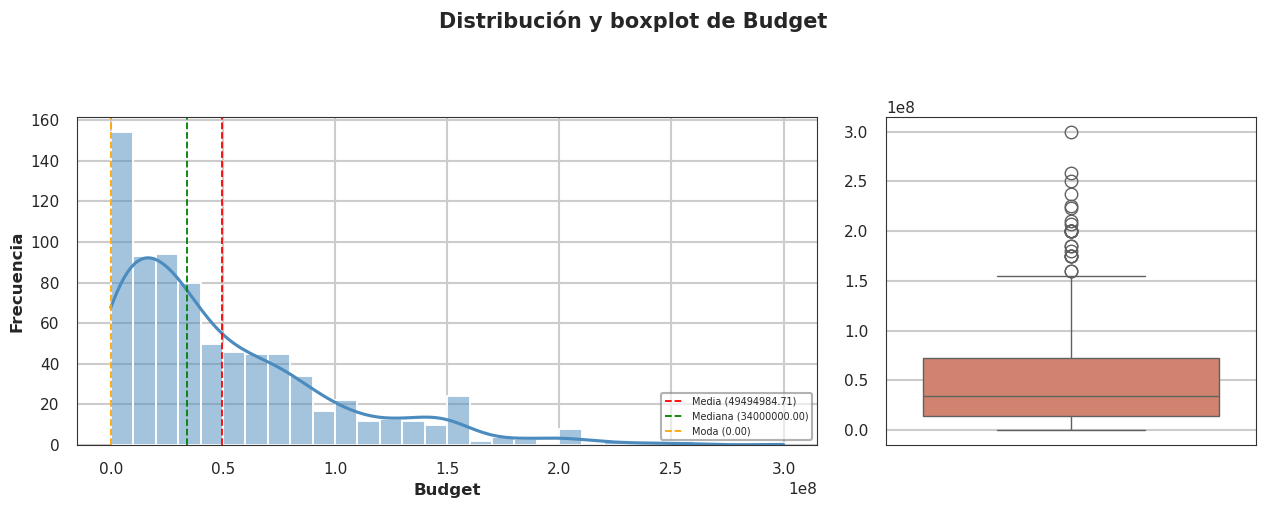

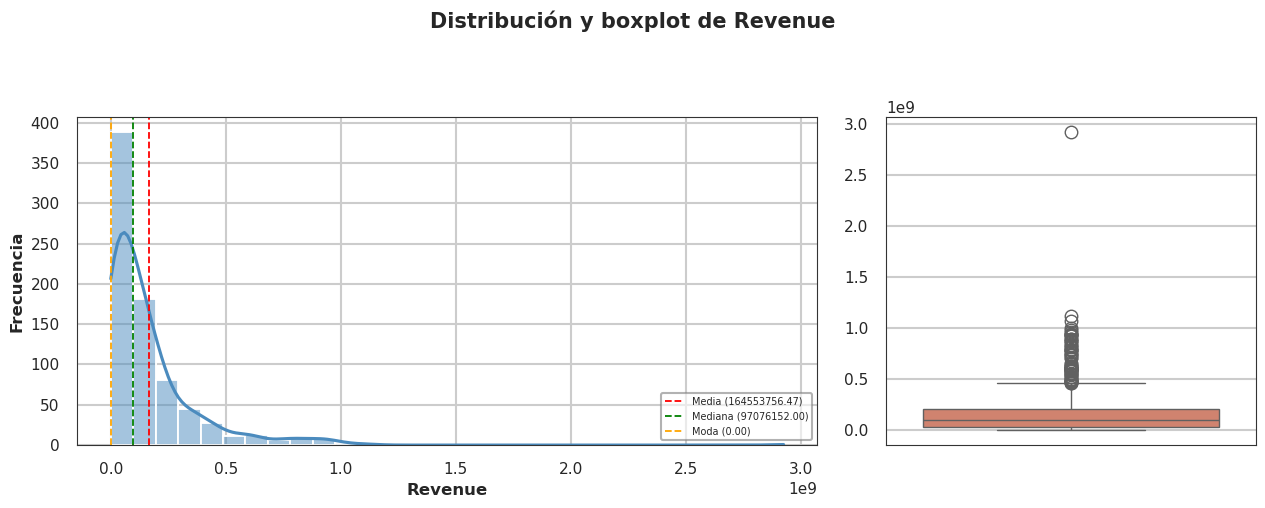

,Columna,Tipo,Valores únicos,% Nulos
Title,Title,object,770,0.00
ReleaseDate,ReleaseDate,object,633,0.00
Overview,Overview,object,770,0.00
VoteAverage,VoteAverage,float64,581,0.00
VoteCount,VoteCount,int64,737,0.00
OriginalLanguage,OriginalLanguage,object,15,0.00
Genres,Genres,object,384,0.39
Runtime,Runtime,int64,109,0.00
Tagline,Tagline,object,732,5.03
Budget,Budget,int64,176,0.00


In [5]:
eda(movies20)

In [6]:
'''Funciones '
'check: visualización'
'null_check: Comprobar  nulos'
'tratar_null: Tratamiento de nulos'
'tratar_duplis:  tratar los duplicados
Esta casilla vamos a guardar las funciones que posteriormente pasaremos a un fichero .py y llamaermos desde main

'''

#Función para comprobar forma, columnas, tiipos de datos, nulos EDA
#Nos ayudará a entender los datos
#La usaremos en el futuro pasando un dataframe

def EDA(df):
        print(f"La forma:")
        print(f"{df.shape}\n")
        print(f"\n-----------------------------\n")
        print(f"Las columnas:")
        print(f"{df.columns}\n")
        print(f"\n-----------------------------\n")
        print(f"Los tipos de datos:")
        print(f"{df.dtypes}\n")
        print(f"\n-----------------------------\n")
        print(f"Los nulos:")
        print(f"{df.isnull().sum()}\n")
        print(f"\n-----------------------------\n")
        print(f"Los duplicados:")
        print(f"{df.duplicated().sum()}\n")
        print(f"\n-----------------------------\n")
        print(f"Los principales estadísticos:")
        print(f"{df.describe().T}\n")

        print(f"Las modas de las columnas categóricas:\n")
        columnas_cat = df.select_dtypes(include = 'object')
        for columna in columnas_cat:
            if df[columna].isnull().any():
                print(f"Revisando {columna}")
                print(df[columna].value_counts())  #mode()[0]
                print("") 
        print(f"\n-----------------------------\n")
        return


def null_check(df):
    
        print(" COLUMNAS CATEGÓRICAS")
        col_obj = df.select_dtypes(include='object').columns
        #Lista para guardar columnas

        found_obj = False  #Manera de comprobar que vamos a encontra nulos las columnas categoricas
        #Recorremos el bucle columna por columna
        for col in col_obj:
            
            por = df[col].isnull().mean() * 100
            if por > 0:
                print(f" - {col}: {por:.0f}% de nulos")
                #Si el porcentaje es de X se podria comparar aqui y tratar


                found_obj = True #Check de que ha encontrado nulos

        if not found_obj:
            print(" No hay nulos en columnas categóricas")


        #Ahora comprobación de columas de tipo numérico
        print(" COLUMNAS NUMÉRICAS")
        col_num = df.select_dtypes(include='number').columns
        
        found_num = False
        for col in col_num:
            por = df[col].isnull().mean() * 100
            if por > 0:
                print(f" - {col}: {por:.0f}% de nulos")
                found_num = True
        if not found_num:
            print(" No hay nulos en columnas numéricas")


''' 
Esta función va a comprobar los nulos, porsteriormente, tras comprobar el % de nulos toma la decisión de como tratar
En variables categoricas
% pocos---> La moda
% Muchos---> otra categoria
En columnas de tipo numerico

 '''
 

def tratar_null(df):
    
    col_obj = df.select_dtypes(include='object').columns        
    col_num = df.select_dtypes(include='number').columns
    #Lista para guardar columnas, trataremos una a una las nulas, dependiendo el tipo de dato y % de datos
    #Recorremos el bucle columna por columna
    for col in col_obj:
        por = df[col].isnull().mean() * 100
        if por == 0:
            print(f"No hay nulos en: {col} ")
        else:    
            if por < 20:
                # Pocos nulos: imputar con la moda (valor más frecuente)
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> Moda")
                df[col] = df[col].fillna(df[col].mode()[0])

            elif 20 <= por < 80:
                # Bastantes nulos: imputar con valor genérico
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> 'Unknown'")
                df[col] = df[col].fillna('Unknown')

            else:
                # Demasiados nulos: se puede optar por eliminar o marcar aparte
                print(f"Columna {col} tiene {por:.0f}% nulos. Considerar eliminarla o analizarla aparte.")
                df.drop(df[col], axis=1, inplace=True)
                #df[col] = df.drop(df[col], axis=1, inplace=True)
                

            #Si el porcentaje es de X se podria comparar aqui y tratar
            #Ahora comprobación de columas de tipo numérico
    for col in col_num:
        por = df[col].isnull().mean() * 100
        if por == 0:
                print(f"No hay nulos en: {col} ")
        
        else:    
            if por < 20:
                # Pocos nulos: imputar con la media
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> Media")
                imputer = SimpleImputer(strategy='mean')
                df[col] = imputer.fit_transform(df[[col]])

            elif 21 <= por < 70:
                # Porcentaje medio-alto de nulos: imputar con KNN
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> KNNImputer")
                imputer_knn = KNNImputer(n_neighbors=5)
                df[col] = imputer_knn.fit_transform(df[[col]])

                # Cambio

            elif por > 71:
            # Demasiados nulos: imputar con un valor neutro o eliminar
                print(f"Columna {col} tiene {por:.0f}% nulos. Considerar eliminarla o imputar manualmente.")
                #df=df.drop(df[col], axis=1)
        #Ya tratadito devolvemos el df
    
    return df
           

def trata_duplis(df):
    df = df.drop_duplicates()    
    return df   
        
def nulos_pelis(df):
    
    col_obj = df.select_dtypes(include='object').columns        
    col_num = df.select_dtypes(include='number').columns
    #Lista para guardar columnas, trataremos una a una las nulas, dependiendo el tipo de dato y % de datos
    #Recorremos el bucle columna por columna
    for col in col_obj:
        por = df[col].isnull().mean() * 100
        if por == 0:
            print(f"No hay nulos en: {col} ")
        else:    
          
            if 1 <= por < 80:
                # Bastantes nulos: imputar con valor genérico
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> 'Unknown'")
                df[col] = df[col].fillna('Unknown')

            else:
                # Demasiados nulos: se puede optar por eliminar o marcar aparte
                print(f"Columna {col} tiene {por:.0f}% nulos. Considerar eliminarla o analizarla aparte.")
                #df.drop(df[col], axis=1, inplace=True)
                #df[col] = df.drop(df[col], axis=1, inplace=True)
                

            #Si el porcentaje es de X se podria comparar aqui y tratar
            #Ahora comprobación de columas de tipo numérico
    for col in col_num:
        por = df[col].isnull().mean() * 100
        if por == 0:
                print(f"No hay nulos en: {col} ")
        
        else:    
            
                # Porcentaje medio-alto de nulos: imputar con KNN
                print(f"Tratando columna: {col} ({por:.0f}% nulos) -> KNNImputer")
                imputer_knn = KNNImputer(n_neighbors=5)
                df[col] = imputer_knn.fit_transform(df[[col]])

                        
      
    
    return df



In [7]:
# Tagline
# No tiene sentido usar la moda → se indica que el dato está ausente
movies20["Tagline"] = movies20["Tagline"].fillna("Sin tagline")
# ProductionCompanies
# Evitamos atribuir falsamente películas a una empresa concreta
movies20["ProductionCompanies"] = movies20["ProductionCompanies"].fillna("Unknown")
# IMDBId
# No se puede duplicar un identificador único
movies20["IMDBId"] = movies20["IMDBId"].fillna("No asignado")
# ProductionCountries
# Evitamos crear una falsa distribución geográfica
movies20["ProductionCountries"] = movies20["ProductionCountries"].fillna("Unknown")
# Genres
# No imputamos con la moda para no inflar ningún género
movies20["Genres"] = movies20["Genres"].fillna("No especificado")
# SpokenLanguages
# Evitamos dar peso extra al idioma más frecuente (como English)
movies20["SpokenLanguages"] = movies20["SpokenLanguages"].fillna("No especificado")

In [8]:
# Tagline
# No tiene sentido usar la moda → se indica que el dato está ausente
movies80["Tagline"] = movies80["Tagline"].fillna("Sin tagline")
# ProductionCompanies
# Evitamos atribuir falsamente películas a una empresa concreta
movies80["ProductionCompanies"] = movies80["ProductionCompanies"].fillna("Unknown")
# IMDBId
# No se puede duplicar un identificador único
movies80["IMDBId"] = movies80["IMDBId"].fillna("No asignado")
# ProductionCountries
# Evitamos crear una falsa distribución geográfica
movies80["ProductionCountries"] = movies80["ProductionCountries"].fillna("Unknown")
# Genres
# No imputamos con la moda para no inflar ningún género
movies80["Genres"] = movies80["Genres"].fillna("No especificado")
# SpokenLanguages
# Evitamos dar peso extra al idioma más frecuente (como English)
movies80["SpokenLanguages"] = movies80["SpokenLanguages"].fillna("No especificado")

In [37]:
#Todas las columnas numericas
# df = df.replace(0, np.nan)

In [9]:
movies80['Budget'] = movies80['Budget'].replace(0, np.nan)
movies80['Revenue'] = movies80['Revenue'].replace(0, np.nan)


In [10]:
movies20['Budget'] = movies20['Budget'].replace(0, np.nan)
movies20['Revenue'] = movies20['Revenue'].replace(0, np.nan)

In [11]:
null_check(movies80)

 COLUMNAS CATEGÓRICAS
 No hay nulos en columnas categóricas
 COLUMNAS NUMÉRICAS
 - Budget: 21% de nulos
 - Revenue: 17% de nulos


In [12]:
null_check(movies20)

 COLUMNAS CATEGÓRICAS
 No hay nulos en columnas categóricas
 COLUMNAS NUMÉRICAS
 - Budget: 7% de nulos
 - Revenue: 7% de nulos


In [13]:
movies80ok = nulos_pelis(movies80)
movies20ok= nulos_pelis(movies20)

No hay nulos en: Title 
No hay nulos en: ReleaseDate 
No hay nulos en: Overview 
No hay nulos en: OriginalLanguage 
No hay nulos en: Genres 
No hay nulos en: Tagline 
No hay nulos en: ProductionCompanies 
No hay nulos en: ProductionCountries 
No hay nulos en: SpokenLanguages 
No hay nulos en: IMDBId 
No hay nulos en: VoteAverage 
No hay nulos en: VoteCount 
No hay nulos en: Runtime 
Tratando columna: Budget (21% nulos) -> KNNImputer
Tratando columna: Revenue (17% nulos) -> KNNImputer
No hay nulos en: Title 
No hay nulos en: ReleaseDate 
No hay nulos en: Overview 
No hay nulos en: OriginalLanguage 
No hay nulos en: Genres 
No hay nulos en: Tagline 
No hay nulos en: ProductionCompanies 
No hay nulos en: ProductionCountries 
No hay nulos en: SpokenLanguages 
No hay nulos en: IMDBId 
No hay nulos en: VoteAverage 
No hay nulos en: VoteCount 
No hay nulos en: Runtime 
Tratando columna: Budget (7% nulos) -> KNNImputer
Tratando columna: Revenue (7% nulos) -> KNNImputer


In [14]:
movies80ok.to_csv('Pelisdelos80.csv')
movies20ok.to_csv('Pelisdelos20.csv')

In [15]:
movies80ok['Budget'].astype(int)
movies80ok['Revenue'].astype(int)

0       63838039
1        6900000
2       33200000
3       15172313
4       19510371
         ...    
431    235900000
432    381109762
433    538400000
434      5500000
435     11990401
Name: Revenue, Length: 436, dtype: int64

In [16]:
movies20ok['Budget'].astype(int).round(2)
movies20ok['Revenue'].astype(int).round(2)

0        59800000
1       144100000
2       161834276
3        53187659
4        28780255
          ...    
770    2923706026
771     524028679
772      70000000
773     219103655
774      93600000
Name: Revenue, Length: 775, dtype: int64

In [18]:
movies20ok.columns

Index(['Title', 'ReleaseDate', 'Overview', 'VoteAverage', 'VoteCount',
       'OriginalLanguage', 'Genres', 'Runtime', 'Tagline', 'Budget', 'Revenue',
       'ProductionCompanies', 'ProductionCountries', 'SpokenLanguages',
       'IMDBId'],
      dtype='object')

In [19]:
movies20ok.shape

(775, 15)

In [20]:
concatdf = pd.concat([movies20ok, movies80ok])

In [21]:
concatdf.to_csv('union.csv')